<a href="https://colab.research.google.com/github/ucfilho/SwarmCantStopNow/blob/main/Conference_2021/Serie_Temporal/ANN_Temporal_Series_LSTM_keras_furniture_April_11_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [7]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

Cloning into 'Machine_Learning_DataSet'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 65 (delta 18), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (65/65), done.
/content/Machine_Learning_DataSet


In [8]:
df = pd.read_excel("Superstore.xls")
print(df.head(3)) # shows headers with top 3 rows

   Row ID        Order ID Order Date  ... Quantity Discount    Profit
0       1  CA-2016-152156 2016-11-08  ...        2      0.0   41.9136
1       2  CA-2016-152156 2016-11-08  ...        3      0.0  219.5820
2       3  CA-2016-138688 2016-06-12  ...        2      0.0    6.8714

[3 rows x 21 columns]


In [9]:
Names =df['Category'].drop_duplicates()
print(Names)

0          Furniture
2    Office Supplies
7         Technology
Name: Category, dtype: object


In [10]:
Stuff =df['Sub-Category'].drop_duplicates()
print(Stuff)

0        Bookcases
1           Chairs
2           Labels
3           Tables
4          Storage
5      Furnishings
6              Art
7           Phones
8          Binders
9       Appliances
12           Paper
26     Accessories
30       Envelopes
53       Fasteners
138       Supplies
165       Machines
335        Copiers
Name: Sub-Category, dtype: object


In [11]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')

y = furniture['Sales'].resample('MS').mean()
y = y.reset_index()

In [12]:
chairs = df.loc[df['Sub-Category'] == 'Chairs']
chairs = chairs.groupby('Order Date')['Sales'].sum().reset_index()
chairs = chairs.set_index('Order Date')
w = chairs['Sales'].resample('MS').mean()
w=w.fillna(0)

In [13]:
machines = df.loc[df['Sub-Category'] == 'Machines']
machines = machines.groupby('Order Date')['Sales'].sum().reset_index()
machines = machines.set_index('Order Date')
m = machines['Sales'].resample('MS').mean()
m=m.fillna(0) 

In [14]:
tables = df.loc[df['Sub-Category'] == 'Tables']
tables = tables.groupby('Order Date')['Sales'].sum().reset_index()
tables = tables.set_index('Order Date')
t = tables['Sales'].resample('MS').mean()
t=t.fillna(0) 

In [15]:
names = t.index; print(names)

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Order Date', freq='MS')


In [16]:
import datetime
months = []
for i in names:
  months.append(i.month)
#months =pd.Series(months).reset_index()

In [17]:
len(y)

48

In [18]:
y1 = y.shift(1).values[:,1]
y2 = y.shift(2).values[:,1]
y3 = y.shift(3).values[:,1]
y4 = y.shift(4).values[:,1]
y = y.values[:,1]

In [19]:
dataframe = pd.DataFrame({'mo':months,'t-1':y1,'t-2':y2,'t-3':y3,'y':y})
dataframe = dataframe.dropna()

In [20]:
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
dataframe.head(3)

,mo,t-1,t-2,t-3,y
3,4,857.292,367.932,480.194,567.488
4,5,567.488,857.292,367.932,432.049
5,6,432.049,567.488,857.292,695.059


In [21]:
X=dataframe.iloc[:,:-1]
y=np.array(dataframe.iloc[:,-1]).reshape(-1, 1)

In [22]:
rows, cols = X.shape
ntrain = int(rows*0.8)
X_train=X.iloc[0:ntrain,:].copy()
y_train= y[0:ntrain,:].copy()
X_test=X.drop(X_train.index)
y_test=np.delete(y,range(ntrain))
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [23]:
#, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
#X_train
scalerX = MinMaxScaler() 
scalerY = MinMaxScaler() 
scalerX.fit(X_train) 
scalerY.fit(y_train) 
X_train = scalerX.transform(X_train)
X_test = scalerX.transform(X_test)
y_train= scalerY.transform(y_train) 
y_test= scalerY.transform(y_test)

In [24]:

for i in range(1):
  model = Sequential()
  model.add(LSTM(units=32, activation='tanh',input_shape=(X_train.shape[1], 4)))
  # units=32 
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
  X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
  model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=0)
  y_calc_train=model.predict(X_train)
  y_calc_test=model.predict(X_test)
  mse_test=mean_squared_error(y_test,y_calc_test)
  R2_test=r2_score(y_test,y_calc_test)
  mse_train=mean_squared_error(y_train,y_calc_train)
  R2_train=r2_score(y_train,y_calc_train)





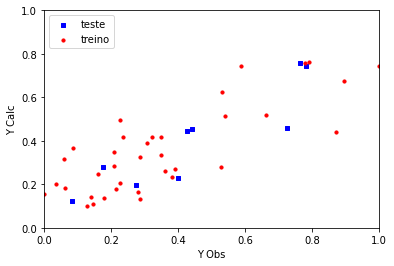

In [25]:

# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(y_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_train,y_calc_train, s=10, c='r', marker="o", label='treino')
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
plt.legend(loc='upper left')
plt.ylabel('Y Calc')
plt.xlabel('Y Obs')
plt.show()

In [26]:
mse=mean_squared_error(y_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_test,y_calc_test)
print("R^2 teste=",R2)

MSE teste= 0.013204312121881253
R^2 teste= 0.7765163283885408


In [27]:
mse=mean_squared_error(y_train,y_calc_train)
print("MSE train=",mse)
R2=r2_score(y_train,y_calc_train)
print("R^2 train=",R2)

MSE train= 0.024402210918855048
R^2 train= 0.6343868981132623


In [28]:
y_calc = y_calc_train.tolist()

In [29]:
for yi in y_calc_test:
  y_calc.append(yi)

In [30]:
y_calc = np.array(y_calc).reshape(1,-1)
y_calc = scalerY.inverse_transform(y_calc)

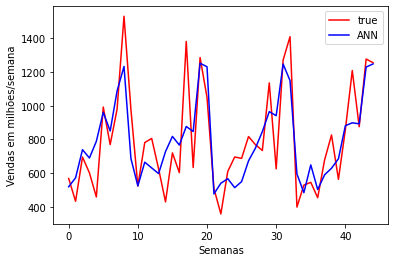

In [42]:
line1, =plt.plot(range(len(y)),y,c='r')
line2, =plt.plot(range(len(y)),y_calc[0], c='b')
plt.legend([line1,line2],['true','ANN'],loc='upper right')
plt.xlabel('Semanas')
plt.ylabel('Vendas em milhões/semana')
plt.show()

In [41]:
df['Product ID'].shape

(9994,)

In [32]:
y_calc

array([[ 518.22591823,  571.72850804,  738.81387541,  689.33224923,
         788.32632847,  960.92637944,  849.98064879, 1088.44085742,
        1233.73172578,  686.44772903,  523.50903241,  664.4558329 ,
         630.41143242,  596.50429913,  727.64386056,  817.7411271 ,
         766.26226941,  876.69336631,  846.78530257, 1252.83234082,
        1232.00514026,  475.74071518,  539.31087354,  566.26297229,
         513.06866879,  548.9176503 ,  672.26375612,  748.14825465,
         846.33624601,  965.28663142,  940.82739385, 1248.24453042,
        1149.71152322,  594.38722812,  483.20984048,  648.42809729,
         501.93941199,  589.50002916,  628.55111779,  685.05656098,
         881.47664716,  898.73434024,  892.46804125, 1230.15692869,
        1248.77797556]])

In [33]:
y

array([[567.4883571428571],
       [432.04918749999996],
       [695.0592421052633],
       [601.1695000000002],
       [457.52165625000004],
       [992.3533666666668],
       [769.0154375],
       [980.2214863636365],
       [1532.2983249999997],
       [978.3284666666667],
       [522.3956666666667],
       [781.2364374999999],
       [805.8229615384615],
       [624.9966999999999],
       [428.56550000000004],
       [719.7063157894737],
       [602.4120125],
       [1382.7906842105265],
       [632.9801842105262],
       [1286.7013541666663],
       [1049.355418181818],
       [508.1828666666667],
       [356.86827272727265],
       [609.5758095238094],
       [695.3731578947368],
       [687.2652272727274],
       [816.9107499999998],
       [768.7364117647057],
       [734.3077823529411],
       [1135.953370833333],
       [624.8724736842106],
       [1271.3451520000003],
       [1410.7198076923075],
       [397.60213333333326],
       [528.1798],
       [544.6722400000001],
   

Text(0, 0.5, 'Vendas em milhões')

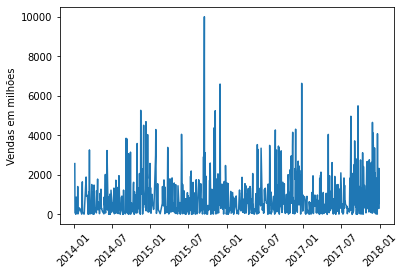

In [40]:
plt.plot(furniture)
plt.xticks(rotation=45)
plt.ylabel('Vendas em milhões')

In [38]:
sum(df['Profit'].values)

286397.02170000126